# Market Advertisement Sales Prediction Project

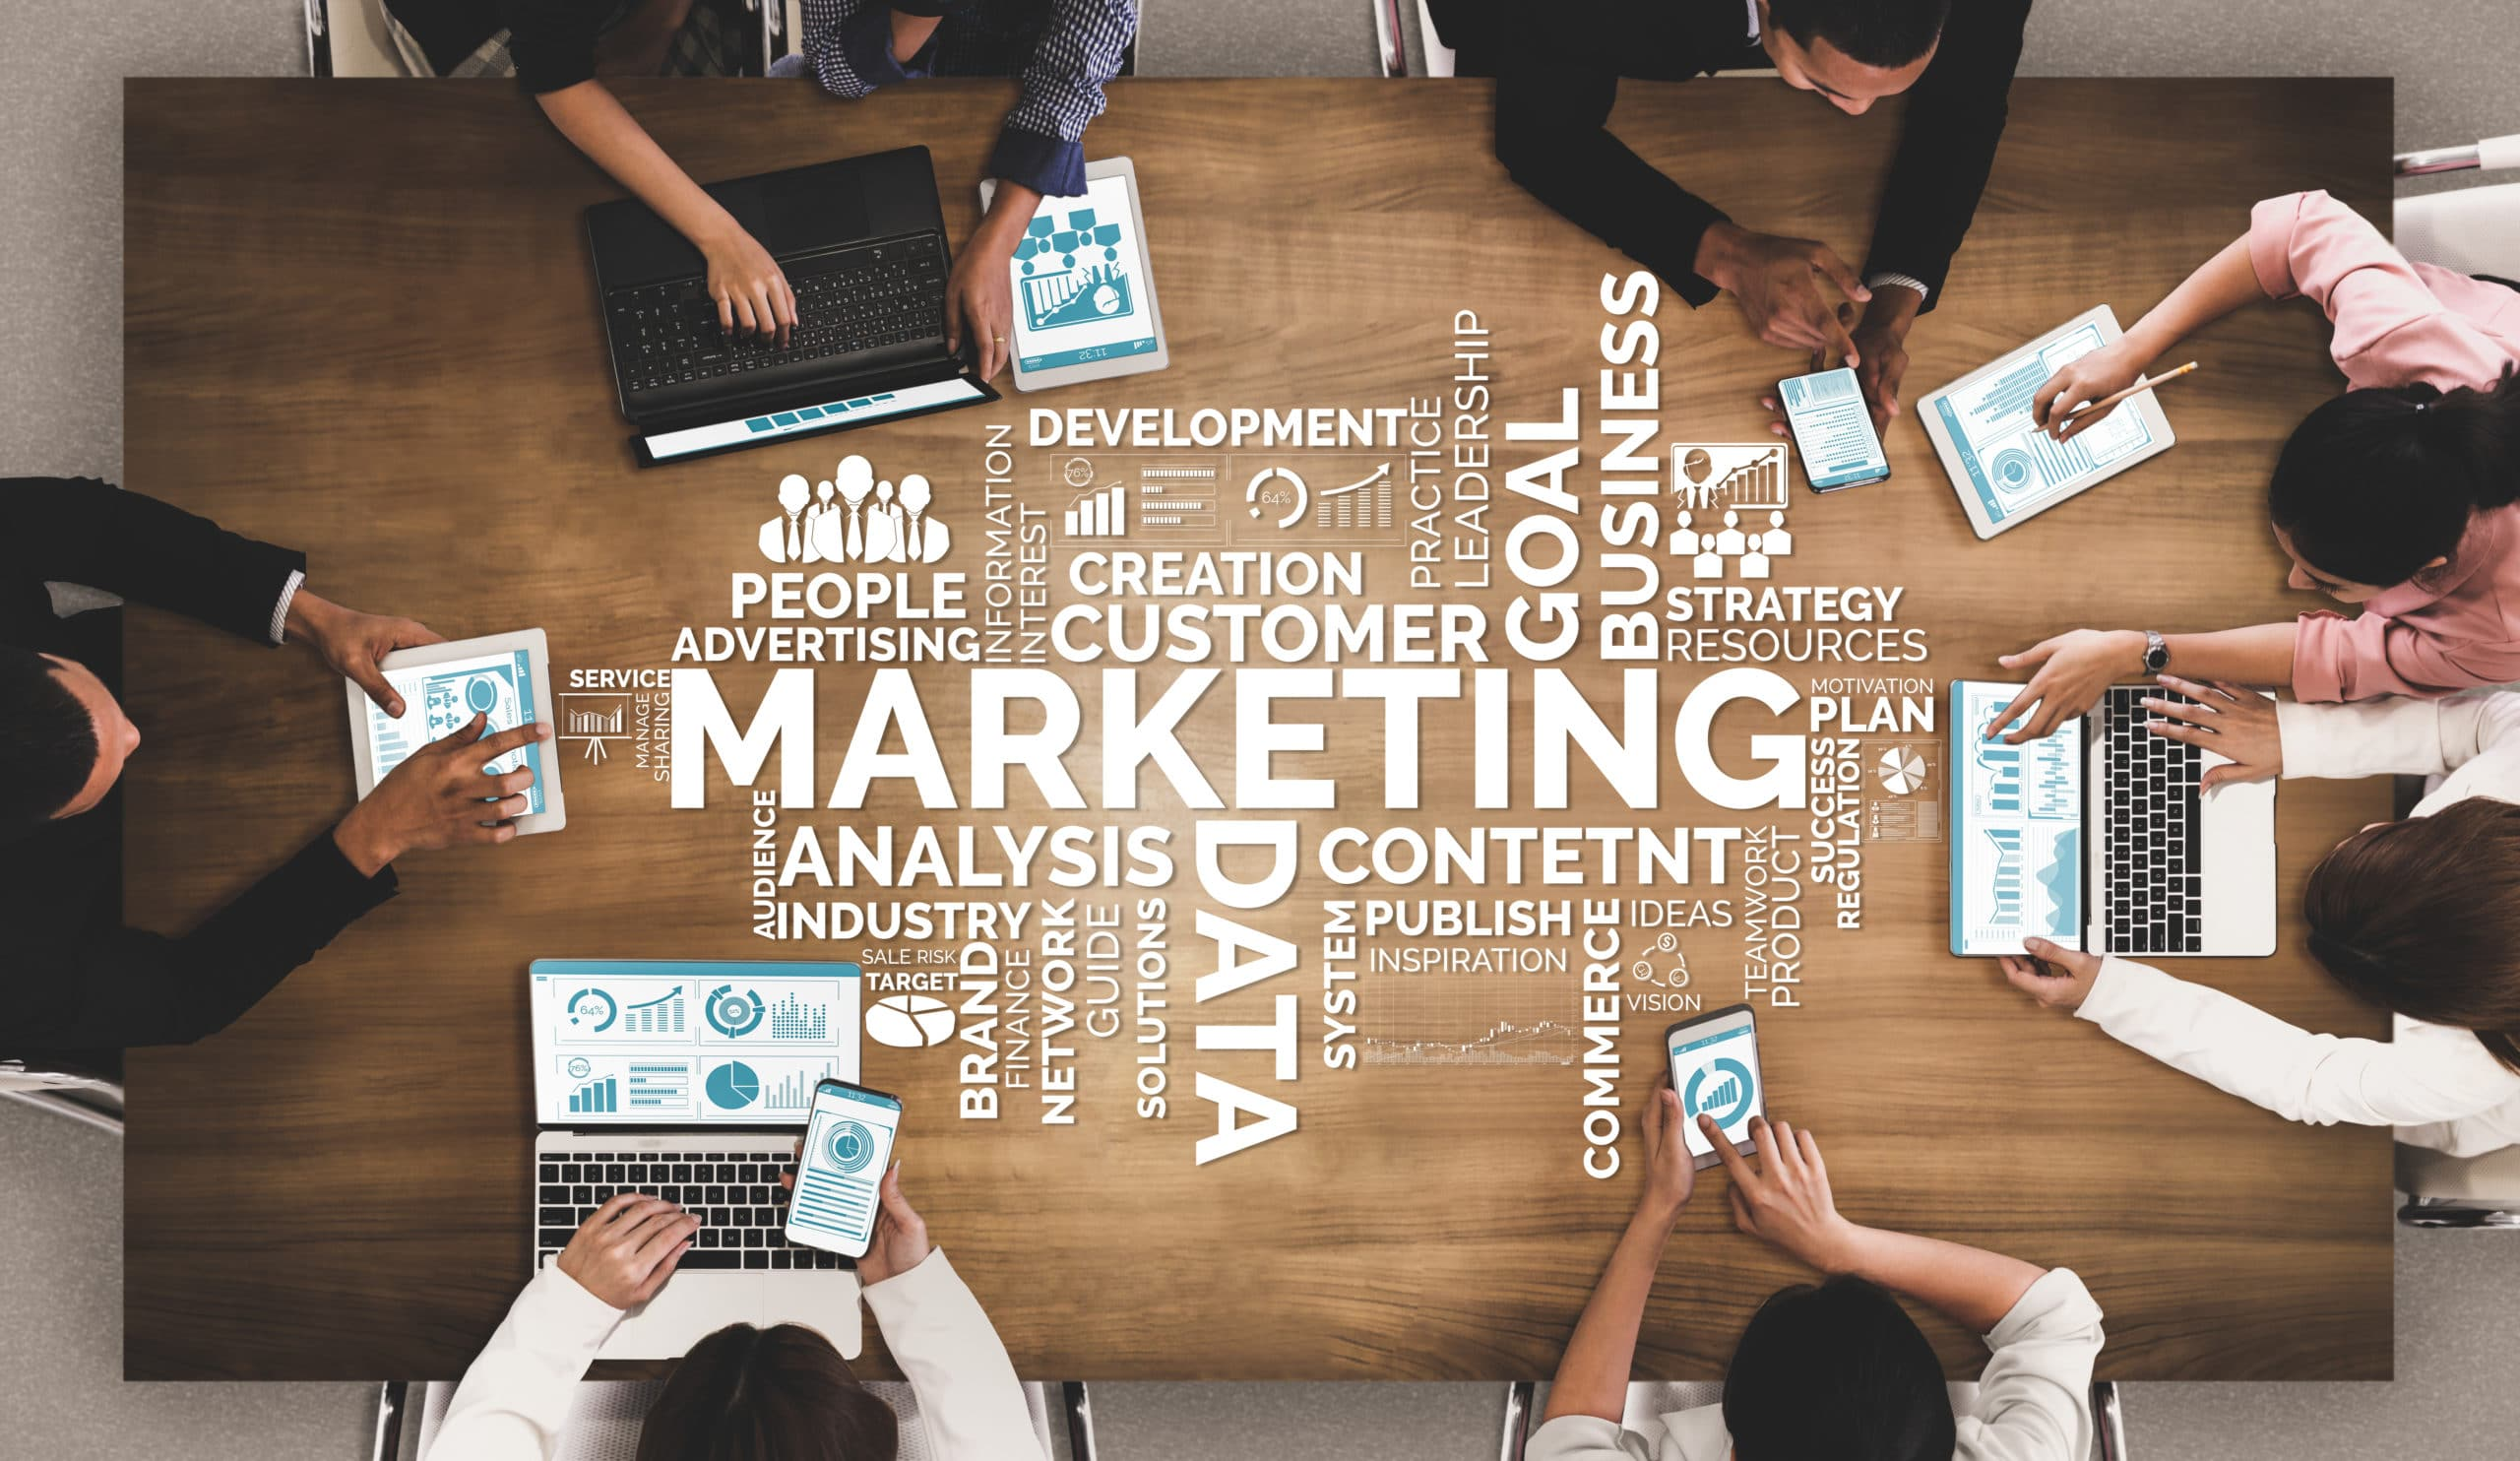

**About this project:**
* Predicting the futures sales for this sales dataset. Using Machine Learning by knowing correlations, ups and downs to predict the future profits by this advertising. It will helpful to optimize their market advertising strategies and maximize the sales potential.

In [59]:
# import data analysis libraries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


___
## Data Cleaning

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* Luckyly we've got a clean data. We don't have any null values.

<Axes: >

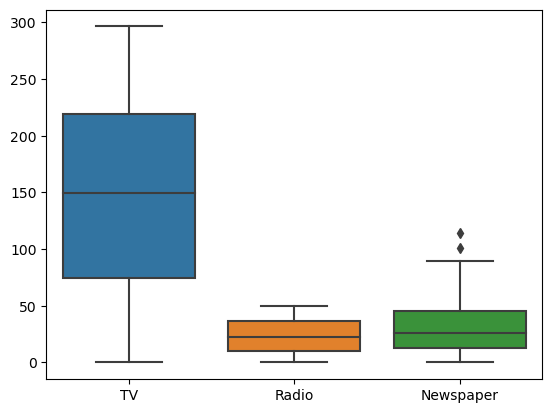

In [6]:
# Look at for outliers.
sns.boxplot(data=df[['TV','Radio','Newspaper']])

* There is no considerable outliers.

___
## Data Exploration

Text(0.5, 1.0, 'TV Marketing Sales')

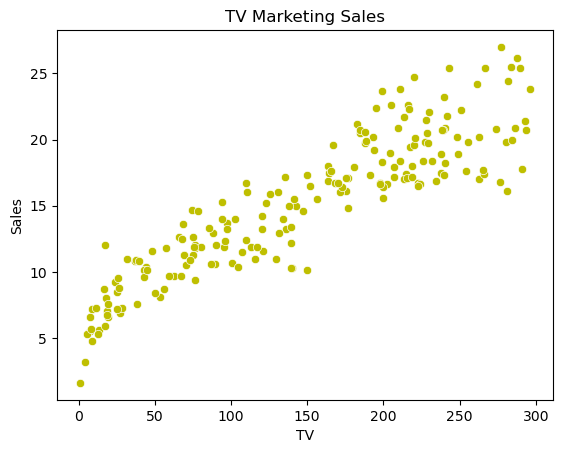

In [7]:
sns.scatterplot(data=df, x='TV', y='Sales', color='y').set_title('TV Marketing Sales')

* If we see into this scatterplot TV marketing sales, It looks like we got a very high range of sales for TV marketing.
___

Text(0.5, 1.0, 'Radio Marketing Sales')

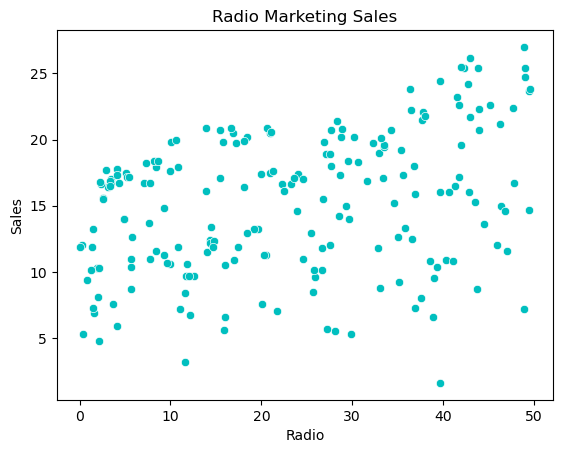

In [8]:
sns.scatterplot(data=df, x='Radio', y='Sales', color='c').set_title('Radio Marketing Sales')

* Radio marketing sales got some high reach as well as low reach of sales.
___

Text(0.5, 1.0, 'Newspaper Marketing Sales')

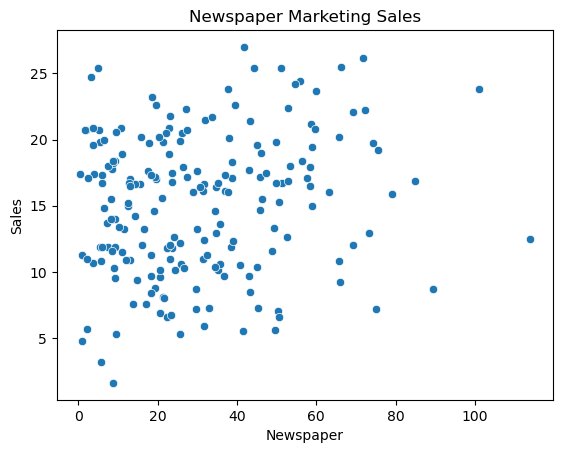

In [9]:
sns.scatterplot(data=df, x='Newspaper', y='Sales').set_title('Newspaper Marketing Sales')

* Looks like Newspaper marketing got some very high reach.
___

<Axes: >

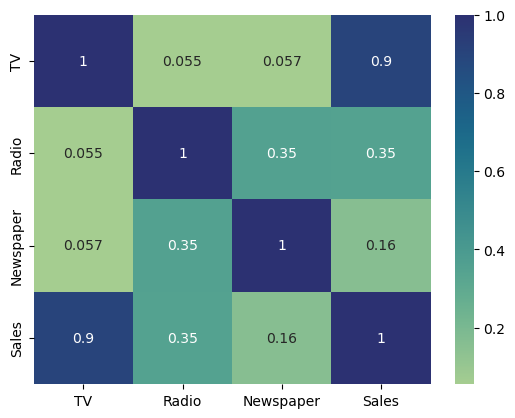

In [10]:
# correlation of Tv, Radio, Newpaper, and Sales.
sns.heatmap(data=df.corr(), annot=True, cmap='crest')

* As we have seen before in scatterplot, **TV** seems to be most correlated with **Sales** i.e., 0.9 and 1.
___

In [11]:
# we can observe also on pivot table.
correlation = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


* We can see in this pivot table, correlation between TV and Sales.
___

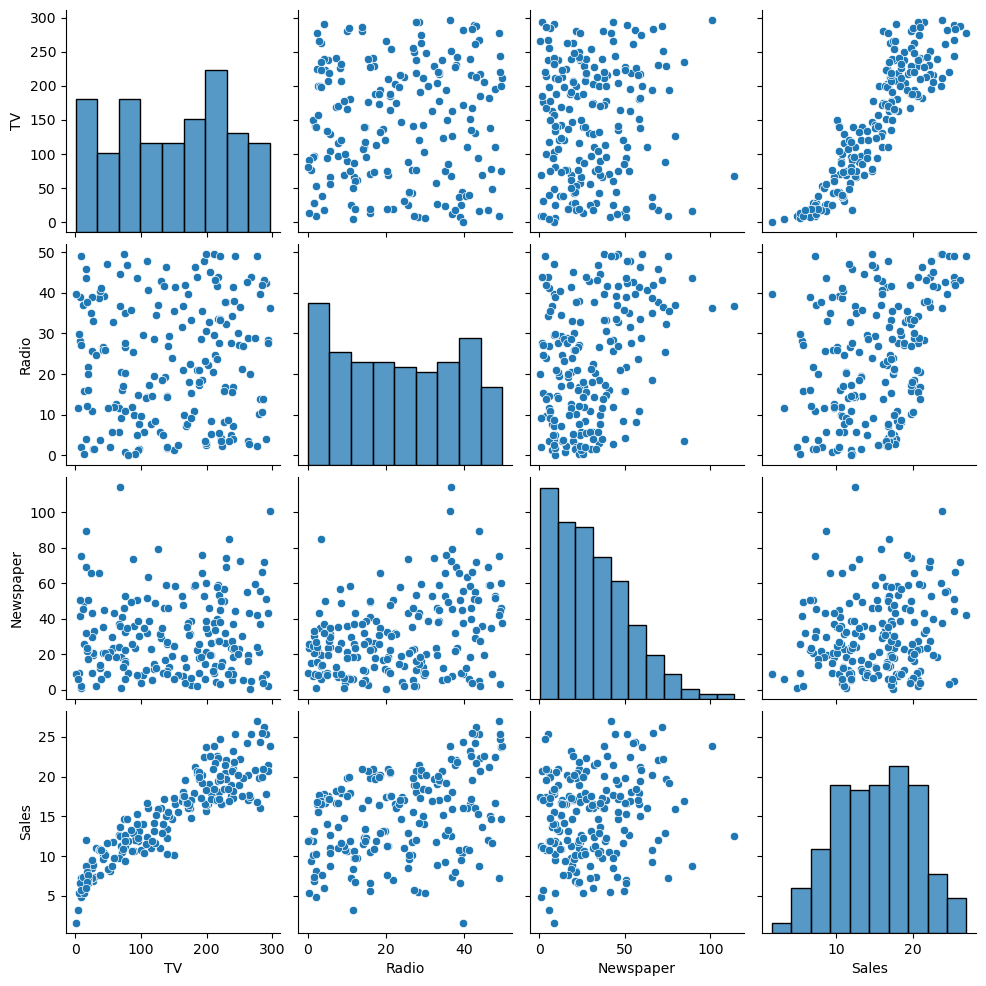

In [12]:
pairplot = sns.pairplot(df, vars=['TV', 'Radio', 'Newspaper', 'Sales'])

___
* Market advertising on three different platforms so conduct seperate model training and evaluation on TV, Radio, Newspaper with Sales.
* So first we assign **TV** and **Sales** variables. As we have seen before TV most correlated to Sales. Let's split the data into two parts Tv 70% and Sales 30%.
## Split the Data for TV

In [114]:
x_tv = df[['TV']]
y_sales = df[['Sales']]

In [115]:
x_tv,y_sales

(        TV
 0    230.1
 1     44.5
 2     17.2
 3    151.5
 4    180.8
 ..     ...
 195   38.2
 196   94.2
 197  177.0
 198  283.6
 199  232.1
 
 [200 rows x 1 columns],
      Sales
 0     22.1
 1     10.4
 2     12.0
 3     16.5
 4     17.9
 ..     ...
 195    7.6
 196   14.0
 197   14.8
 198   25.5
 199   18.4
 
 [200 rows x 1 columns])

___
## Model Training

In [116]:
# Model training to TV and Sales
tv_train, tv_test, sales_train, sales_test = train_test_split(x_tv, y_sales, test_size=0.2, random_state=100)

___
### Predicting TV Platform Advertisment Sales.

In [95]:
lr_tv = LinearRegression()
lr_tv.fit(tv_train, sales_train)

LinearRegression()

In [125]:
tv_lr_pred = lr_tv.predict(tv_test)
tv_lr_pred

array([[ 7.41755568],
       [19.88345888],
       [14.31059417],
       [18.77429648],
       [20.07282807],
       [18.18454672],
       [14.5270161 ],
       [17.68677628],
       [18.70395936],
       [18.72560155],
       [13.33669548],
       [19.41274118],
       [10.03626104],
       [17.15654255],
       [11.713531  ],
       [12.09226938],
       [15.09512366],
       [16.20428606],
       [15.84177932],
       [13.1040419 ],
       [18.61198003],
       [13.99678237],
       [17.56774422],
       [16.57220334],
       [16.99963665],
       [18.91497074],
       [18.887918  ],
       [11.06967576],
       [16.99963665],
       [13.65591783],
       [10.69634793],
       [10.72881122],
       [13.54229631],
       [17.18900584],
       [ 9.70080705],
       [13.51524357],
       [12.25458583],
       [16.10689619],
       [19.02859225],
       [17.44871216]])

___
## Model Evaluation

In [144]:
# Mean Squared Error (MSE)
tv_mse = mean_squared_error(sales_test,tv_lr_pred)
tv_mse

5.34850349246385

In [145]:
# Root Mean Squared Error (RMSE)
tv_rmse = mean_squared_error(sales_test,tv_lr_pred,squared=False)
tv_rmse

2.312683180304611

In [146]:
# Mean Absolute Error (MAE)
tv_mae = mean_absolute_error(sales_test,tv_lr_pred)
tv_mae

1.905152391298234

In [147]:
# R-Squared (R2)
tv_r2 = r2_score(sales_test,tv_lr_pred)
tv_r2

0.7281352744078883

## Split the Data for Radio

In [118]:
x_radio = df[['Radio']]
y_sales = df[['Sales']]

In [119]:
x_radio,y_sales

(     Radio
 0     37.8
 1     39.3
 2     45.9
 3     41.3
 4     10.8
 ..     ...
 195    3.7
 196    4.9
 197    9.3
 198   42.0
 199    8.6
 
 [200 rows x 1 columns],
      Sales
 0     22.1
 1     10.4
 2     12.0
 3     16.5
 4     17.9
 ..     ...
 195    7.6
 196   14.0
 197   14.8
 198   25.5
 199   18.4
 
 [200 rows x 1 columns])

## Model Training

In [120]:
# Model training to Radio and Sales
radio_train, radio_test, sales_train, sales_test = train_test_split(x_radio, y_sales, test_size=0.2, random_state=100)

___
### Predicting Radio Platform Advertisment Sales.

In [121]:
lr_radio = LinearRegression()
lr_radio.fit(radio_train, sales_train)

LinearRegression()

In [123]:
radio_lr_pred = lr_radio.predict(radio_test)
radio_lr_pred

array([[16.64514457],
       [16.11773356],
       [16.96617736],
       [16.02600991],
       [16.54195546],
       [12.78128565],
       [13.82464222],
       [12.58637289],
       [16.96617736],
       [17.21841741],
       [13.87050404],
       [15.88842443],
       [12.83861294],
       [14.60429327],
       [13.5380058 ],
       [12.74688928],
       [16.2667845 ],
       [13.07938753],
       [16.40436998],
       [14.18007137],
       [14.93679152],
       [12.83861294],
       [17.65410476],
       [16.01454445],
       [14.59282782],
       [17.8031557 ],
       [16.02600991],
       [14.51256962],
       [17.21841741],
       [16.15212993],
       [17.28721015],
       [13.25136938],
       [13.14818027],
       [14.26032957],
       [13.51507488],
       [15.45273707],
       [12.35706376],
       [12.99912933],
       [12.57490743],
       [14.29472594]])

___
## Model Evaluation

In [148]:
# Mean Squared Error (MSE)
radio_mse = mean_squared_error(radio_test,radio_lr_pred)
radio_mse

247.1910745385172

In [149]:
# Root Mean Squared Error (RMSE)
radio_rmse = mean_squared_error(radio_test,radio_lr_pred,squared=False)
radio_rmse

15.722311361199955

In [150]:
# Mean Absolute Error (MAE)
radio_mae = mean_absolute_error(radio_test,radio_lr_pred)
radio_mae

12.89321582055248

In [151]:
# R-Squared (R2)
radio_r2 = r2_score(radio_test,radio_lr_pred)
radio_r2

-0.13852928687249366

___
## Split the Data for Newspaper

In [131]:
x_newspaper = df[['Newspaper']]
y_sales = df[['Sales']]

In [133]:
x_newspaper,y_sales

(     Newspaper
 0         69.2
 1         45.1
 2         69.3
 3         58.5
 4         58.4
 ..         ...
 195       13.8
 196        8.1
 197        6.4
 198       66.2
 199        8.7
 
 [200 rows x 1 columns],
      Sales
 0     22.1
 1     10.4
 2     12.0
 3     16.5
 4     17.9
 ..     ...
 195    7.6
 196   14.0
 197   14.8
 198   25.5
 199   18.4
 
 [200 rows x 1 columns])

___
## Model Training

In [134]:
# Model training to Newspaper and Sales
newspaper_train, newspaper_test, sales_train, sales_test = train_test_split(x_newspaper, y_sales, test_size=0.2, random_state=100)

___
### Predicting Radio Platform Advertisment Sales.

In [135]:
lr_newspaper = LinearRegression()
lr_newspaper.fit(newspaper_train, sales_train)

LinearRegression()

In [137]:
newspaper_lr_pred = lr_newspaper.predict(newspaper_test)
newspaper_lr_pred

array([[15.76048224],
       [13.5642424 ],
       [15.5326163 ],
       [16.16773201],
       [14.43207227],
       [14.24784023],
       [14.54842935],
       [13.59333167],
       [15.22717897],
       [14.62600073],
       [13.56909061],
       [16.90466017],
       [14.74720602],
       [13.76786729],
       [14.56297398],
       [13.69999232],
       [13.59817988],
       [15.01385766],
       [13.66605484],
       [15.17869685],
       [13.50121565],
       [14.82477741],
       [15.87199111],
       [15.18354506],
       [14.37389373],
       [13.46242996],
       [15.49383061],
       [14.88295595],
       [13.38970678],
       [13.90846542],
       [15.03325051],
       [13.35092109],
       [15.66836622],
       [14.54842935],
       [14.19935812],
       [13.99573323],
       [14.76175066],
       [13.92785827],
       [13.9424029 ],
       [16.49256219]])

___
## Model Evaluation

In [154]:
# Mean Squared Error (MSE)
newspaper_mse = mean_squared_error(newspaper_test,newspaper_lr_pred)
newspaper_mse

452.98862497578

In [155]:
# Root Mean Squared Error (RMSE)
newspaper_rmse = mean_squared_error(newspaper_test,newspaper_lr_pred,squared=False)
newspaper_rmse

21.283529429485608

In [156]:
# Mean Absolute Error (MAE)
newspaper_mae = mean_absolute_error(newspaper_test,newspaper_lr_pred)
newspaper_mae

16.444039203463987

In [157]:
# R-Squared (R2)
newspaper_r2 = r2_score(radio_test,radio_lr_pred)
newspaper_r2

-0.13852928687249366

___
* Let's see the complete Evaluation.

In [171]:
Evaluation_table = [['TV', 5.34850349246385, 2.312683180304611, 1.905152391298234, 0.7281352744078883],
                   ['Radio', 247.1910745385172, 15.722311361199955, 12.89321582055248, -0.13852928687249366],
                   ['Newspaper', 452.98862497578, 21.283529429485608, 16.444039203463987, -0.13852928687249366]]

Column_names = ['Platforms','MSE', 'RMSE', 'MAE', 'R2-Squared']

Evaluation_data = pd.DataFrame(Evaluation_table, columns=Column_names)

In [172]:
Evaluation_data

,Platforms,MSE,RMSE,MAE,R2-Squared
0,TV,5.348503,2.312683,1.905152,0.728135
1,Radio,247.191075,15.722311,12.893216,-0.138529
2,Newspaper,452.988625,21.283529,16.444039,-0.138529


* From this we can observe the R2-Squared, From Radio and Newspaper didn't get much sales to improve the market sales.
* TV sales are got 72%. This is a decent -squares value.

___
## Saving the Model

In [173]:
import pickle

In [174]:
with open('TV Sales', 'wb') as m:
    pickle.dump(lr_tv,m)

In [175]:
with open('TV Sales', 'rb') as m:
    model = pickle.load(m)

In [176]:
import joblib

In [178]:
joblib.dump(model, "TV_model_joblib.pkl")

['TV_model_joblib.pkl']

___
## Prediction

In [179]:
model.predict(tv_test)

array([[ 7.41755568],
       [19.88345888],
       [14.31059417],
       [18.77429648],
       [20.07282807],
       [18.18454672],
       [14.5270161 ],
       [17.68677628],
       [18.70395936],
       [18.72560155],
       [13.33669548],
       [19.41274118],
       [10.03626104],
       [17.15654255],
       [11.713531  ],
       [12.09226938],
       [15.09512366],
       [16.20428606],
       [15.84177932],
       [13.1040419 ],
       [18.61198003],
       [13.99678237],
       [17.56774422],
       [16.57220334],
       [16.99963665],
       [18.91497074],
       [18.887918  ],
       [11.06967576],
       [16.99963665],
       [13.65591783],
       [10.69634793],
       [10.72881122],
       [13.54229631],
       [17.18900584],
       [ 9.70080705],
       [13.51524357],
       [12.25458583],
       [16.10689619],
       [19.02859225],
       [17.44871216]])

In [180]:
prediction = joblib.load('TV_model_joblib.pkl')

In [183]:
pred_observation = [[230.1]]

In [184]:
prediction.predict(pred_observation)

array([[19.44520447]])

## Thank You!